# Principal Components Analysis: Iris Data Set

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Load and normalize the data

In [2]:
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [3]:
X_train_mean = np.mean(X_train, axis=0)
X_train_std = np.std(X_train, axis=0)
X_train_scaled = (X_train - X_train_mean) / X_train_std
X_test_scaled = (X_test - X_train_mean) / X_train_std

N_train = X_train_scaled.shape[0]

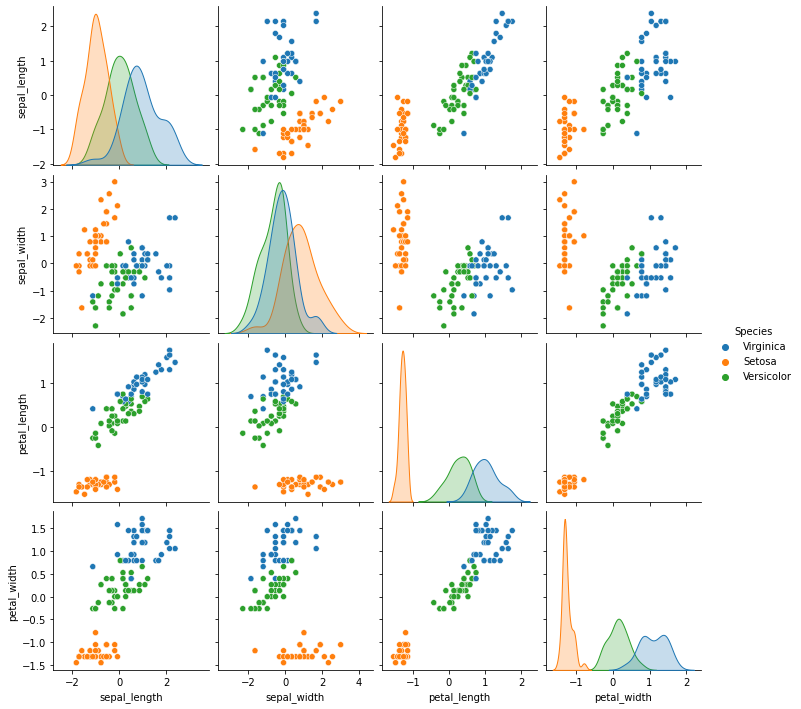

In [4]:
df = pd.DataFrame(np.hstack((X_train_scaled, y_train.reshape(-1,1))), 
                  columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width','Species'])
target_names = {0:'Setosa', 1:'Versicolor', 2:'Virginica'}
df["Species"] = df["Species"].map(target_names)
sns.pairplot(df, hue="Species", palette=["C0", "C1", "C2"])
plt.show()

## Perform PCA

In [5]:
# Compute the covariance matrix
C = np.dot(X_train_scaled.T, X_train_scaled) / N_train
print("Covariance Matrix:")
print(C)

Covariance Matrix:
[[ 1.         -0.07508407  0.8748601   0.81678983]
 [-0.07508407  1.         -0.40548769 -0.35556639]
 [ 0.8748601  -0.40548769  1.          0.96304528]
 [ 0.81678983 -0.35556639  0.96304528  1.        ]]


In [6]:
eigvals, eigvecs = np.linalg.eig(C)
print("Eigenvectors (each column):")
print(eigvecs)
print("Eigenvalues (each element):")
print(eigvals)

Eigenvectors (each column):
[[ 0.523215   -0.38039416 -0.70557265  0.28933299]
 [-0.25169956 -0.92371023  0.25874261 -0.12829262]
 [ 0.58317039 -0.01602484  0.11116789 -0.80454783]
 [ 0.56815992 -0.04246043  0.65027779  0.50252385]]
Eigenvalues (each element):
[2.89818405 0.94570059 0.13691497 0.01920039]


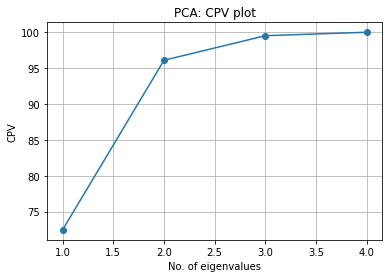

In [7]:
cpv = np.cumsum(eigvals) / np.sum(eigvals) * 100
plt.plot(range(1,len(eigvals)+1),cpv,'o-')
plt.title('PCA: CPV plot')
plt.xlabel('No. of eigenvalues')
plt.ylabel('CPV')
plt.grid()
plt.show()

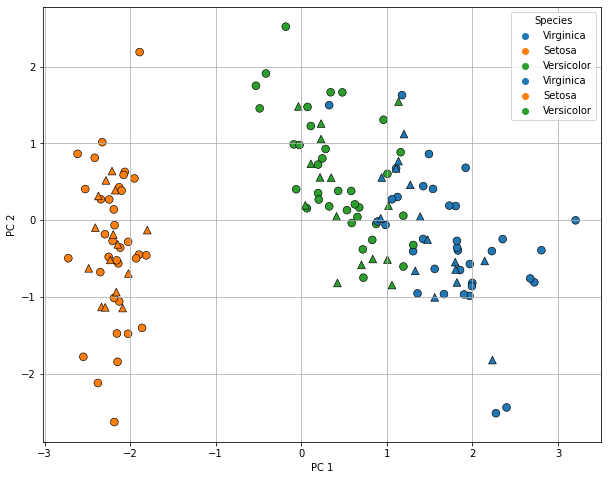

In [8]:
# Project only using the first 2 principal components (eigenvectors)
train_scores = X_train_scaled @ eigvecs[:,:2]
test_scores = X_test_scaled @ eigvecs[:,:2]

# Visualize the PC scores
pca_train = pd.DataFrame(np.hstack((train_scores, y_train.reshape(-1,1))), 
                         columns=['PC 1', 'PC 2', 'Species'])
pca_test = pd.DataFrame(np.hstack((test_scores, y_test.reshape(-1,1))), 
                        columns=['PC 1', 'PC 2', 'Species'])

pca_train["Species"] = pca_train["Species"].map(target_names)
pca_test["Species"] = pca_test["Species"].map(target_names)

plt.figure(figsize=(10,8))
sns.scatterplot(data=pca_train, x="PC 1", y="PC 2", s=60, edgecolor='k', marker='o', hue='Species')
sns.scatterplot(data=pca_test, x="PC 1", y="PC 2", s=60, edgecolor='k', marker='^', hue='Species')
plt.grid()
plt.show()